In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("../data/data.csv")

In [3]:
df.head()

,title,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r,news
0,Ward was convicted of arson in 2006. He was gi...,0.123,0.627,0.058,-0.151,26,262,0.725,0.380,0.048,0.251,0.148,0.173,Real
1,At vast global gatherings like the climate whi...,0.047,0.540,0.094,0.104,44,371,0.714,0.425,0.036,0.290,0.085,0.163,Real
2,had decided to release Life on Mars as a singl...,0.025,0.306,0.088,0.105,31,212,0.726,0.283,0.053,0.350,0.190,0.124,Real
3,In a land of the grammar is king. I should kno...,0.025,0.460,0.092,0.214,26,241,0.689,0.403,0.032,0.262,0.125,0.177,Real
4,In came under fire for suggesting that half of...,0.092,0.702,0.103,0.039,29,450,0.716,0.431,0.063,0.256,0.096,0.153,Real


In [4]:
df[df["news"] == "Real" ]["neu_score"].mean(),df[df["news"] == "Fake" ]["neu_score"].mean()

(0.6267532786885246, 0.5534238969985239)

In [5]:
df[df["news"] == "Real" ]["compound_score"].mean(),df[df["news"] == "Fake" ]["compound_score"].mean()

(0.0908673155737705, 0.001072330654420207)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21954 entries, 0 to 21953
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            21954 non-null  object 
 1   neg_score        21954 non-null  float64
 2   neu_score        21954 non-null  float64
 3   pos_score        21954 non-null  float64
 4   compound_score   21954 non-null  float64
 5   n_sentences      21954 non-null  int64  
 6   n_tokens         21954 non-null  int64  
 7   unique_tokens_r  21954 non-null  float64
 8   nouns_r          21954 non-null  float64
 9   proper_nouns_r   21954 non-null  float64
 10  verbs_r          21954 non-null  float64
 11  adverbs_r        21954 non-null  float64
 12  adjectives_r     21954 non-null  float64
 13  news             21954 non-null  object 
dtypes: float64(10), int64(2), object(2)
memory usage: 2.3+ MB


In [7]:
df.describe()

,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r
count,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000,21954.000000
mean,0.070169,0.586024,0.084192,0.040992,23.024734,279.121299,0.776901,0.388735,0.110228,0.268513,0.090306,0.142207
std,0.056102,0.158847,0.054276,0.241192,26.933824,269.267979,0.111943,0.078509,0.113204,0.072139,0.047133,0.052852
min,0.000000,0.000000,0.000000,-0.998000,1.000000,1.000000,0.099000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036000,0.508000,0.055000,-0.087000,7.000000,102.000000,0.705000,0.354000,0.051000,0.236000,0.065000,0.118000
50%,0.061000,0.600000,0.078000,0.049500,16.000000,223.000000,0.772000,0.394000,0.085000,0.269000,0.088000,0.144000
75%,0.092000,0.685000,0.105000,0.181000,29.000000,370.000000,0.847000,0.432000,0.130000,0.302000,0.113000,0.169000
max,1.000000,0.979000,1.000000,1.000000,735.000000,3970.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'neg_score'}>,
        <Axes: title={'center': 'neu_score'}>,
        <Axes: title={'center': 'pos_score'}>],
       [<Axes: title={'center': 'compound_score'}>,
        <Axes: title={'center': 'n_sentences'}>,
        <Axes: title={'center': 'n_tokens'}>],
       [<Axes: title={'center': 'unique_tokens_r'}>,
        <Axes: title={'center': 'nouns_r'}>,
        <Axes: title={'center': 'proper_nouns_r'}>],
       [<Axes: title={'center': 'verbs_r'}>,
        <Axes: title={'center': 'adverbs_r'}>,
        <Axes: title={'center': 'adjectives_r'}>]], dtype=object)

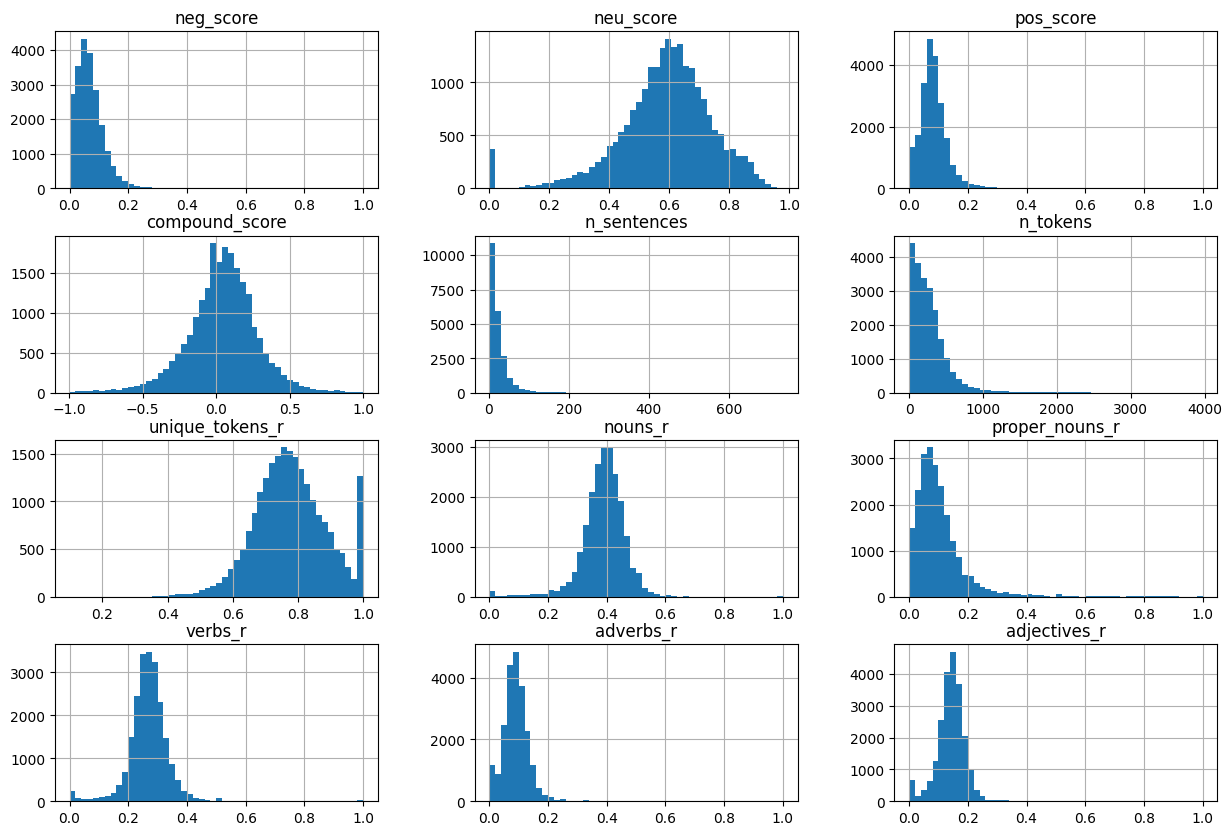

In [8]:
df.hist(figsize=(15,10), bins=50)

In [9]:
news = df.drop("title",axis=1)

In [10]:
news["news"] = news["news"].map({"Real":1,"Fake":0})

In [11]:
corr_matrix = news.corr()

In [12]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r,news
neg_score,1.000000,0.167105,-0.206025,-0.703640,-0.020132,-0.024224,0.001545,0.012121,0.019880,0.018657,-0.073654,-0.020470,-0.151705
neu_score,0.167105,1.000000,0.208899,0.049991,-0.073998,0.096807,-0.084598,0.150082,-0.222610,0.064789,0.001457,0.164179,0.229400
pos_score,-0.206025,0.208899,1.000000,0.575908,-0.004591,-0.012029,0.068866,-0.149924,-0.002399,0.033507,0.053521,0.134353,0.021174
compound_score,-0.703640,0.049991,0.575908,1.000000,0.006604,0.021825,-0.012858,-0.081749,-0.001913,-0.027662,0.080033,0.091950,0.185005
n_sentences,-0.020132,-0.073998,-0.004591,0.006604,1.000000,0.896480,-0.535364,0.019036,-0.154095,0.054200,0.120724,0.120185,0.053803
n_tokens,-0.024224,0.096807,-0.012029,0.021825,0.896480,1.000000,-0.619458,0.096198,-0.197741,0.019731,0.083146,0.179565,0.173877
unique_tokens_r,0.001545,-0.084598,0.068866,-0.012858,-0.535364,-0.619458,1.000000,-0.094671,0.019624,0.058663,0.063057,-0.037683,-0.174170
nouns_r,0.012121,0.150082,-0.149924,-0.081749,0.019036,0.096198,-0.094671,1.000000,-0.522897,-0.150907,-0.253231,0.066421,0.170739
proper_nouns_r,0.019880,-0.222610,-0.002399,-0.001913,-0.154095,-0.197741,0.019624,-0.522897,1.000000,-0.480265,-0.324356,-0.420416,-0.229022
verbs_r,0.018657,0.064789,0.033507,-0.027662,0.054200,0.019731,0.058663,-0.150907,-0.480265,1.000000,0.084236,-0.187165,0.042488


In [13]:
corr_matrix["news"].sort_values(ascending=False)

news               1.000000
neu_score          0.229400
compound_score     0.185005
n_tokens           0.173877
nouns_r            0.170739
adjectives_r       0.101133
adverbs_r          0.087188
n_sentences        0.053803
verbs_r            0.042488
pos_score          0.021174
neg_score         -0.151705
unique_tokens_r   -0.174170
proper_nouns_r    -0.229022
Name: news, dtype: float64

In [14]:
news["article_tone"] = news["compound_score"] + news["neu_score"]
news["mean_sentence_length"] = news["n_tokens"] / news["n_sentences"]


In [15]:
corr_matrix = news.corr()

In [16]:
corr_matrix["news"].sort_values(ascending=False)

news                    1.000000
article_tone            0.274451
neu_score               0.229400
mean_sentence_length    0.218395
compound_score          0.185005
n_tokens                0.173877
nouns_r                 0.170739
adjectives_r            0.101133
adverbs_r               0.087188
n_sentences             0.053803
verbs_r                 0.042488
pos_score               0.021174
neg_score              -0.151705
unique_tokens_r        -0.174170
proper_nouns_r         -0.229022
Name: news, dtype: float64

In [17]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,neg_score,neu_score,pos_score,compound_score,n_sentences,n_tokens,unique_tokens_r,nouns_r,proper_nouns_r,verbs_r,adverbs_r,adjectives_r,news,article_tone,mean_sentence_length
neg_score,1.000000,0.167105,-0.206025,-0.703640,-0.020132,-0.024224,0.001545,0.012121,0.019880,0.018657,-0.073654,-0.020470,-0.151705,-0.484727,-0.011732
neu_score,0.167105,1.000000,0.208899,0.049991,-0.073998,0.096807,-0.084598,0.150082,-0.222610,0.064789,0.001457,0.164179,0.229400,0.578634,0.364898
pos_score,-0.206025,0.208899,1.000000,0.575908,-0.004591,-0.012029,0.068866,-0.149924,-0.002399,0.033507,0.053521,0.134353,0.021174,0.582640,-0.006282
compound_score,-0.703640,0.049991,0.575908,1.000000,0.006604,0.021825,-0.012858,-0.081749,-0.001913,-0.027662,0.080033,0.091950,0.185005,0.843494,0.050897
n_sentences,-0.020132,-0.073998,-0.004591,0.006604,1.000000,0.896480,-0.535364,0.019036,-0.154095,0.054200,0.120724,0.120185,0.053803,-0.034404,-0.155917
n_tokens,-0.024224,0.096807,-0.012029,0.021825,0.896480,1.000000,-0.619458,0.096198,-0.197741,0.019731,0.083146,0.179565,0.173877,0.069886,0.042136
unique_tokens_r,0.001545,-0.084598,0.068866,-0.012858,-0.535364,-0.619458,1.000000,-0.094671,0.019624,0.058663,0.063057,-0.037683,-0.174170,-0.055998,-0.131225
nouns_r,0.012121,0.150082,-0.149924,-0.081749,0.019036,0.096198,-0.094671,1.000000,-0.522897,-0.150907,-0.253231,0.066421,0.170739,0.013959,0.111138
proper_nouns_r,0.019880,-0.222610,-0.002399,-0.001913,-0.154095,-0.197741,0.019624,-0.522897,1.000000,-0.480265,-0.324356,-0.420416,-0.229022,-0.121284,-0.038202
verbs_r,0.018657,0.064789,0.033507,-0.027662,0.054200,0.019731,0.058663,-0.150907,-0.480265,1.000000,0.084236,-0.187165,0.042488,0.012255,-0.035926


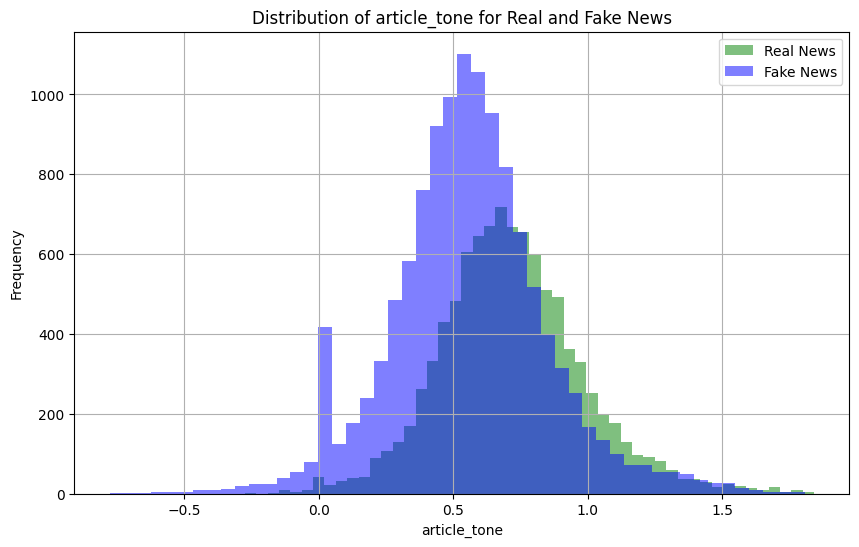

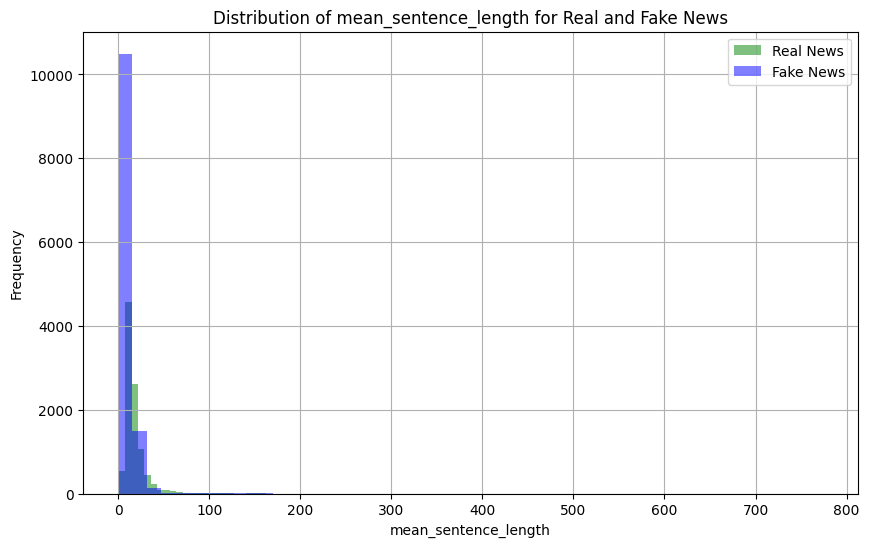

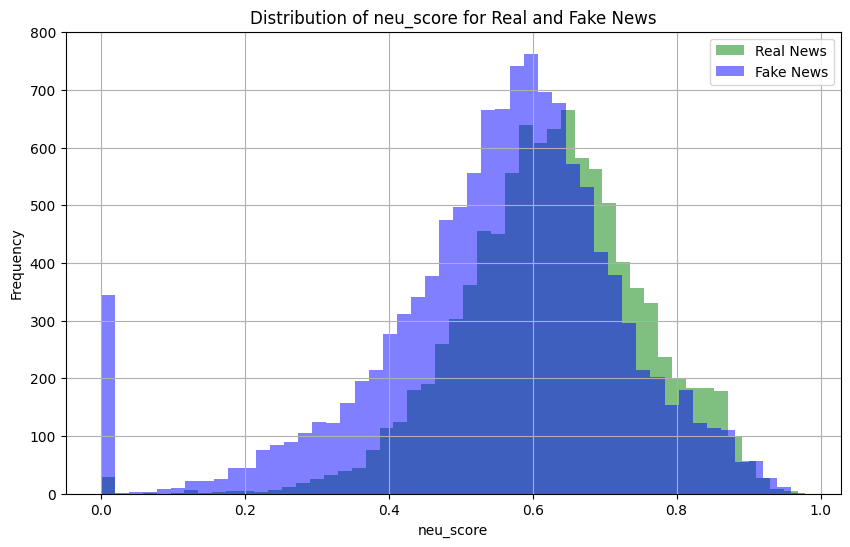

In [18]:
plot_data = ["article_tone", "mean_sentence_length", "neu_score"]

for data in plot_data:
    plt.figure(figsize=(10, 6))
    
    # Histogram dla real news
    news[news['news'] == 1][data].hist(alpha=0.5, bins=50, label='Real News', color='green')
    
    # Histogram dla fake news
    news[news['news'] == 0][data].hist(alpha=0.5, bins=50, label='Fake News', color='blue')
    
    plt.title(f'Distribution of {data} for Real and Fake News')
    plt.xlabel(data)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [19]:
news_labels = news["news"]

news = news.drop("news",axis=1)

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class Estimator_Transformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.means_ = None
    self.stds_ = None

  def fit(self,X,y=None):
    self.means_ = np.mean(X,axis=0)
    self.stds_ = np.std(X, axis=0)
    return self

  def transform(self,X):
    X_standardized = (X - self.means_) / self.stds_
    return X_standardized

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news, news_labels, test_size=0.2, random_state=42)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('estimator', Estimator_Transformer())
])

news_prepared = pipeline.fit_transform(X_train)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier

KNeighborsClassifier()
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), SGDClassifier(), GaussianNB(), , ExtraTreesClassifier() ]

for model in models:
    scores = cross_val_score(model, news_prepared, y_train, scoring='accuracy', cv=3)
    print(f'{model} Accuracy: {scores.mean()}')    

LogisticRegression() Accuracy: 0.7203779587380602
DecisionTreeClassifier() Accuracy: 0.7058591297042923
RandomForestClassifier() Accuracy: 0.7908670231735296
SVC() Accuracy: 0.7927461483050267
GradientBoostingClassifier() Accuracy: 0.7892159153890898
SGDClassifier() Accuracy: 0.7137161488428309
GaussianNB() Accuracy: 0.6357681863187451
KNeighborsClassifier() Accuracy: 0.7487900619214045
ExtraTreesClassifier() Accuracy: 0.7888743464535212


In [54]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=500, objective='binary:logistic', random_state=42)
xgb_model.fit(news_prepared, y_train, eval_set = [(pipeline.transform(X_test), y_test)])

[0]	validation_0-logloss:0.65556
[1]	validation_0-logloss:0.62769
[2]	validation_0-logloss:0.60498
[3]	validation_0-logloss:0.58561
[4]	validation_0-logloss:0.56856
[5]	validation_0-logloss:0.55351
[6]	validation_0-logloss:0.54028
[7]	validation_0-logloss:0.52898
[8]	validation_0-logloss:0.51889
[9]	validation_0-logloss:0.51009
[10]	validation_0-logloss:0.50301
[11]	validation_0-logloss:0.49605
[12]	validation_0-logloss:0.49009
[13]	validation_0-logloss:0.48496
[14]	validation_0-logloss:0.48059
[15]	validation_0-logloss:0.47580
[16]	validation_0-logloss:0.47214
[17]	validation_0-logloss:0.46831
[18]	validation_0-logloss:0.46542
[19]	validation_0-logloss:0.46199
[20]	validation_0-logloss:0.45960
[21]	validation_0-logloss:0.45723
[22]	validation_0-logloss:0.45517
[23]	validation_0-logloss:0.45311
[24]	validation_0-logloss:0.45137
[25]	validation_0-logloss:0.44945
[26]	validation_0-logloss:0.44767
[27]	validation_0-logloss:0.44628
[28]	validation_0-logloss:0.44492
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, xgb_model.predict(pipeline.transform(X_test)))

0.8007287633796402

In [ ]:
from itertools import combinations
base_models = [LogisticRegression(), DecisionTreeClassifier(), SVC(probability=True),  KNeighborsClassifier(),SGDClassifier(),KNeighborsClassifier()]
best_score = 0
best_ensemble = None

for combo in combinations(base_models, 3):
    ensemble = VotingClassifier(estimators=[(f'{model}', model) for model in combo], voting='soft')
    scores = cross_val_score(ensemble, news_prepared, y_train, scoring='accuracy', cv=3)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_ensemble = ensemble
        
print(f"Best ensemble: {best_ensemble} Accuracy: {best_score}")

In [49]:
def display_scores(scores):
  print("Scores:",scores)
  print("Mean",scores.mean())
  print("STD:",scores.std())

In [143]:
from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


grid_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=5, verbose=3, random_state=42 )



grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: {:.2f}".format(grid_search.best_score_))

# Best parameters found:  {'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}
# Best cross-validated score: 0.88

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   7.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   7.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   7.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   7.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   7.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   7.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.775 total time=   8.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.763 total time=   8.0s


KeyboardInterrupt: 

In [86]:
final_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=120, objective='binary:logistic', random_state=42, subsample=0.8, min_child_weight=10, max_depth=4, gamma=1.5, colsample_bytree=0.6)
final_model.fit(news_prepared, y_train,eval_set=[(pipeline.transform(X_test), y_test)])
test_prepared = pipeline.transform(X_test)

final_predictions = final_model.predict(test_prepared)
final_scores = cross_val_score(final_model, X_test, y_test, scoring='accuracy', cv=3)

[0]	validation_0-logloss:0.67322
[1]	validation_0-logloss:0.65360
[2]	validation_0-logloss:0.63353
[3]	validation_0-logloss:0.61470
[4]	validation_0-logloss:0.59992
[5]	validation_0-logloss:0.58641
[6]	validation_0-logloss:0.57306
[7]	validation_0-logloss:0.56011
[8]	validation_0-logloss:0.55346
[9]	validation_0-logloss:0.54493
[10]	validation_0-logloss:0.53688
[11]	validation_0-logloss:0.52962
[12]	validation_0-logloss:0.52550
[13]	validation_0-logloss:0.52148
[14]	validation_0-logloss:0.51833
[15]	validation_0-logloss:0.51268
[16]	validation_0-logloss:0.50687
[17]	validation_0-logloss:0.50288
[18]	validation_0-logloss:0.50077
[19]	validation_0-logloss:0.49623
[20]	validation_0-logloss:0.49308
[21]	validation_0-logloss:0.49037
[22]	validation_0-logloss:0.48785
[23]	validation_0-logloss:0.48604
[24]	validation_0-logloss:0.48297
[25]	validation_0-logloss:0.48018
[26]	validation_0-logloss:0.47778
[27]	validation_0-logloss:0.47615
[28]	validation_0-logloss:0.47462
[29]	validation_0-loglos

In [117]:
display_scores(final_scores)

Scores: [0.80122951 0.79439891 0.78400547]
Mean 0.7932112945055136
STD: 0.007081652635610343


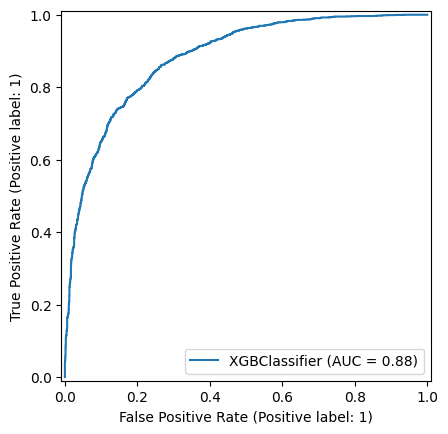

In [118]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(final_model, test_prepared, y_test)
plt.show()

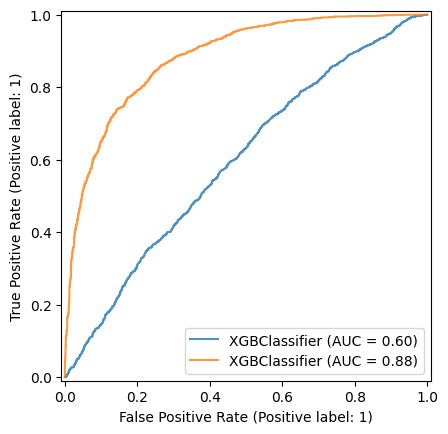

In [119]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(final_model, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [120]:
from sklearn.model_selection import cross_val_predict

y_pred_prob = final_model.predict_proba(test_prepared)[:, 1] 

predictions = (y_pred_prob >= 0.5).astype(int)

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, predictions) 

In [122]:
roc_auc

0.7938864670855159

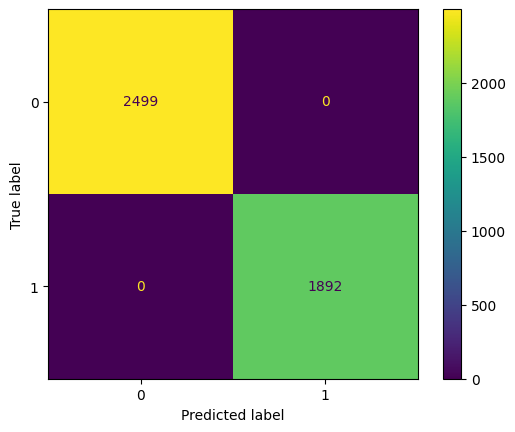

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_model, test_prepared, predictions)

In [124]:
probabilities = final_model.predict_proba(X_test)[:, 1]

In [125]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Generuj różne progi
thresholds = np.arange(0, 1.01, 0.01)

# Oblicz precyzję, recall i F1 dla różnych progów
precisions, recalls, _ = precision_recall_curve(y_test, probabilities)
f1_scores = [f1_score(y_test, probabilities >= threshold) for threshold in thresholds]

# Znajdź próg z najwyższym F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Najlepszy próg: {best_threshold}")

Najlepszy próg: 0.64


In [126]:
# Klasyfikacja z nowym progiem
predictions = (probabilities >= 0.6).astype(int)

In [127]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [114]:
import joblib

joblib.dump(final_model, "predictor01.pkl")

['predictor01.pkl']